# 损失函数

In [1]:
import tensorflow as tf

## 1.MSE误差函数

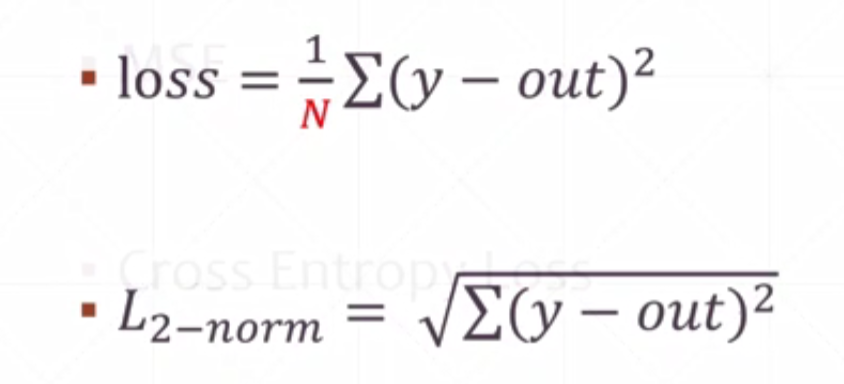

In [5]:
target = tf.constant([1,2,3,0,1])
target = tf.one_hot(target,depth=4)
target = tf.cast(target,dtype=tf.float32)
target

<tf.Tensor: id=11, shape=(5, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)>

In [6]:
out = tf.random.normal([5,4])
out

<tf.Tensor: id=17, shape=(5, 4), dtype=float32, numpy=
array([[ 0.24377118,  0.45006827,  1.0774139 , -1.8916664 ],
       [ 1.5473436 ,  1.3966949 , -0.95872813,  1.935551  ],
       [ 2.6541636 , -0.01434967, -1.5403004 , -1.0946066 ],
       [ 0.36105448,  0.03837407, -0.24670671, -0.4044088 ],
       [-0.66025645, -0.1460848 ,  0.23774463,  0.5022521 ]],
      dtype=float32)>

In [10]:
tf.reduce_mean(tf.square(target-out))# 最常见的误差函数，mean默认对整个batch的数量求均值

<tf.Tensor: id=46, shape=(), dtype=float32, numpy=1.6763064>

In [9]:
tf.square(tf.norm(target-out))/(5*4) #利用二阶范数来求，这里需要自己额外除以batch

<tf.Tensor: id=42, shape=(), dtype=float32, numpy=1.6763064>

In [11]:
tf.reduce_mean(tf.losses.MSE(target,out))#直接调用MSE函数来求

<tf.Tensor: id=51, shape=(), dtype=float32, numpy=1.6763064>

## 2.熵，当事情发生的可能性越小的时候提供的信息量越大，用熵来定义信息量的多少

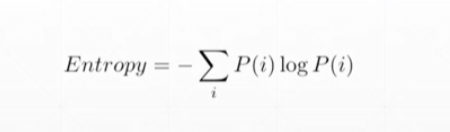

In [13]:
a = tf.fill([4],0.25)
a

<tf.Tensor: id=57, shape=(4,), dtype=float32, numpy=array([0.25, 0.25, 0.25, 0.25], dtype=float32)>

In [14]:
-tf.reduce_sum(a*tf.math.log(a)/tf.math.log(2.))

<tf.Tensor: id=65, shape=(), dtype=float32, numpy=2.0>

In [15]:
a = tf.constant([0.2,0.2,0.4,0.2])
a

<tf.Tensor: id=66, shape=(4,), dtype=float32, numpy=array([0.2, 0.2, 0.4, 0.2], dtype=float32)>

In [16]:
-tf.reduce_sum(a*tf.math.log(a)/tf.math.log(2.))

<tf.Tensor: id=74, shape=(), dtype=float32, numpy=1.9219282>

In [17]:
a = tf.constant([0.97,0.01,0.01,0.01])
a

<tf.Tensor: id=75, shape=(4,), dtype=float32, numpy=array([0.97, 0.01, 0.01, 0.01], dtype=float32)>

In [18]:
-tf.reduce_sum(a*tf.math.log(a)/tf.math.log(2.))

<tf.Tensor: id=83, shape=(), dtype=float32, numpy=0.24194068>

## 通过这三种发生的情况，可以得知，当预测正确率越高，熵值越小，可以作为反映性能的指标

## 3.交叉熵 Cross Entropy

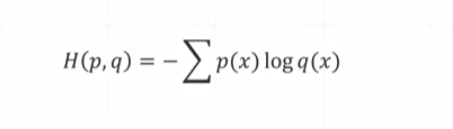

## 对于单输出的函数来讲，熵值为
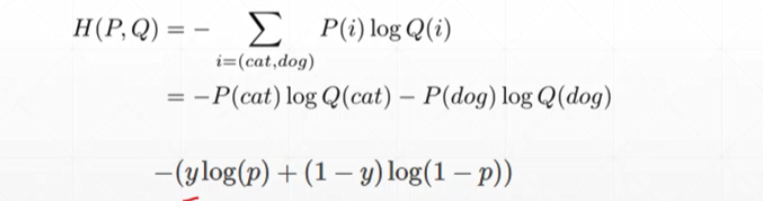

## 对于多分类的情况p为正确的分类，Q为预测的分类
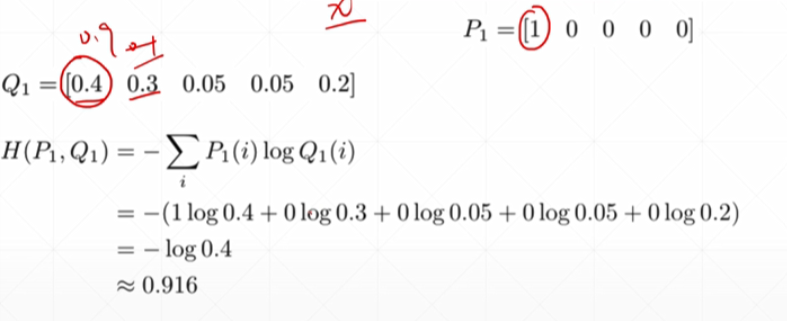

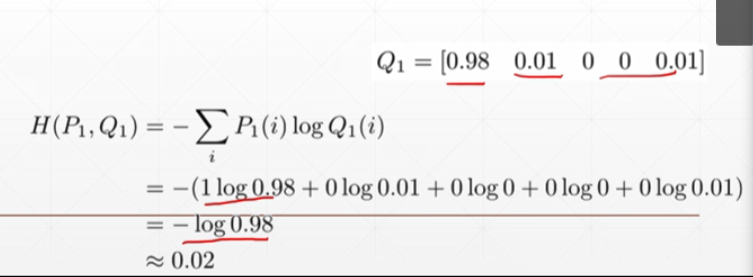

## 当分类能力没有那么强的时候，交叉熵值很大，反之，则越小，可知交叉熵也可以作为反映性能的指标

In [21]:
tf.losses.categorical_crossentropy([0,1,0,0],[0.25,0.25,0.25,0.25])

<tf.Tensor: id=113, shape=(), dtype=float32, numpy=1.3862944>

In [22]:
tf.losses.categorical_crossentropy([0,1,0,0],[0.9,0.01,0.01,0.08])

<tf.Tensor: id=130, shape=(), dtype=float32, numpy=4.6051702>

In [23]:
tf.losses.categorical_crossentropy([0,1,0,0],[0.1,0.8,0.05,0.05])#现成的函数可以调用

<tf.Tensor: id=147, shape=(), dtype=float32, numpy=0.22314353>

In [26]:
tf.losses.binary_crossentropy([1],[0.1])#二分类只有一个输入

<tf.Tensor: id=197, shape=(), dtype=float32, numpy=2.3025842>

## 4.关于MSE和cross entropy 选择的比较
## 对于sigmoid函数在两边梯度几乎为0，可能在训练开始时出现gradient vanish的情况

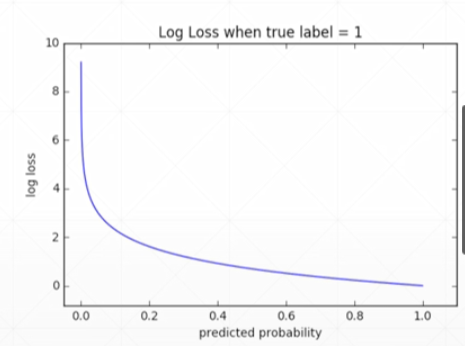

## 而对于交叉熵来讲，它一开始的梯度性能非常的好
## 当然具体问题具体分析